# Find Most Similar Data from Image or Text Queries

[![Jupyter Notebook](https://img.shields.io/badge/jupyter-%23FA0F00.svg?style=for-the-badge&logo=jupyter&logoColor=white)](https://github.com/openvinotoolkit/datumaro/blob/develop/notebooks/07_data_explorer.ipynb)

In this notebook example, we'll take a look at Datumaro data exploration Python API. Specifically, we are going to provide the example codes for data exploration for image query and text query with MS-COCO 2017 dataset.
Please prepare COCO 2017 validation dataset or download it referring [this link](https://github.com/openvinotoolkit/datumaro/blob/develop/notebooks/03_visualize.ipynb).

In [13]:
# Copyright (C) 2022 Intel Corporation
#
# SPDX-License-Identifier: MIT

import datumaro as dm
from datumaro.components.explorer import Explorer
from datumaro.components.visualizer import Visualizer

## Data exploration

### Explore with COCO instance segmentation dataset
To use data exploration, we need to define hash for each dataset. So, set `save_hash` as `True`. The default value is `False`.

In [14]:
dataset = dm.Dataset.import_from("coco_dataset", format="coco_instances")
dataset

Dataset
	size=5000
	source_path=coco_dataset
	media_type=<class 'datumaro.components.media.Image'>
	annotated_items_count=4952
	annotations_count=78647
subsets
	val2017: # of items=5000, # of annotated items=4952, # of annotations=78647, annotation types=['polygon', 'bbox', 'mask']
infos
	categories
	label: ['person', 'bicycle', 'car', 'motorcycle', 'airplane', 'bus', 'train', 'truck', 'boat', 'traffic light', 'fire hydrant', 'stop sign', 'parking meter', 'bench', 'bird', 'cat', 'dog', 'horse', 'sheep', 'cow', 'elephant', 'bear', 'zebra', 'giraffe', 'backpack', 'umbrella', 'handbag', 'tie', 'suitcase', 'frisbee', 'skis', 'snowboard', 'sports ball', 'kite', 'baseball bat', 'baseball glove', 'skateboard', 'surfboard', 'tennis racket', 'bottle', 'wine glass', 'cup', 'fork', 'knife', 'spoon', 'bowl', 'banana', 'apple', 'sandwich', 'orange', 'broccoli', 'carrot', 'hot dog', 'pizza', 'donut', 'cake', 'chair', 'couch', 'potted plant', 'bed', 'dining table', 'toilet', 'tv', 'laptop', 'mouse', 

Set explorer with `dataset` which is used to database.

In [15]:
explorer = Explorer(dataset)

### Explore with `image` query

Set one of dataset as query which you want to find similar dataset. 

In [16]:
for i, item in enumerate(dataset):
    if i == 50:
        query = item

Use Visualizer to check which query will be used.

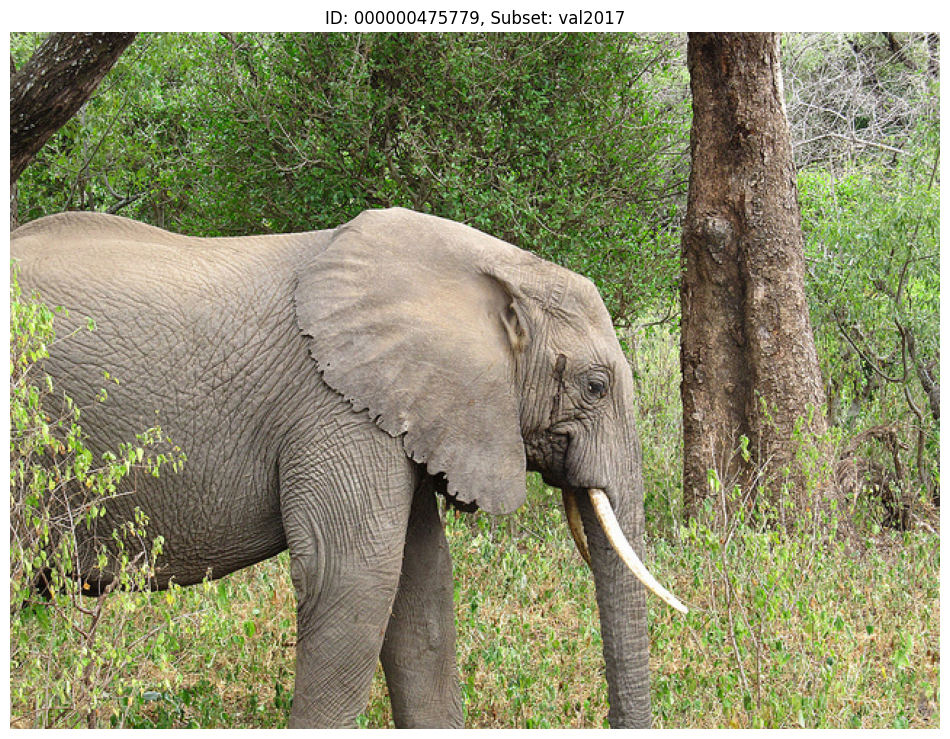

In [17]:
visualizer = Visualizer(dataset, figsize=(12, 12), alpha=0)
fig = visualizer.vis_one_sample(query.id, "val2017")
fig.show()

In [18]:
topk_list = explorer.explore_topk(query, topk=15)

In [19]:
subset_list = []
id_list = []
for result in topk_list:
    subset_list.append(result.subset)
    id_list.append(result.id)

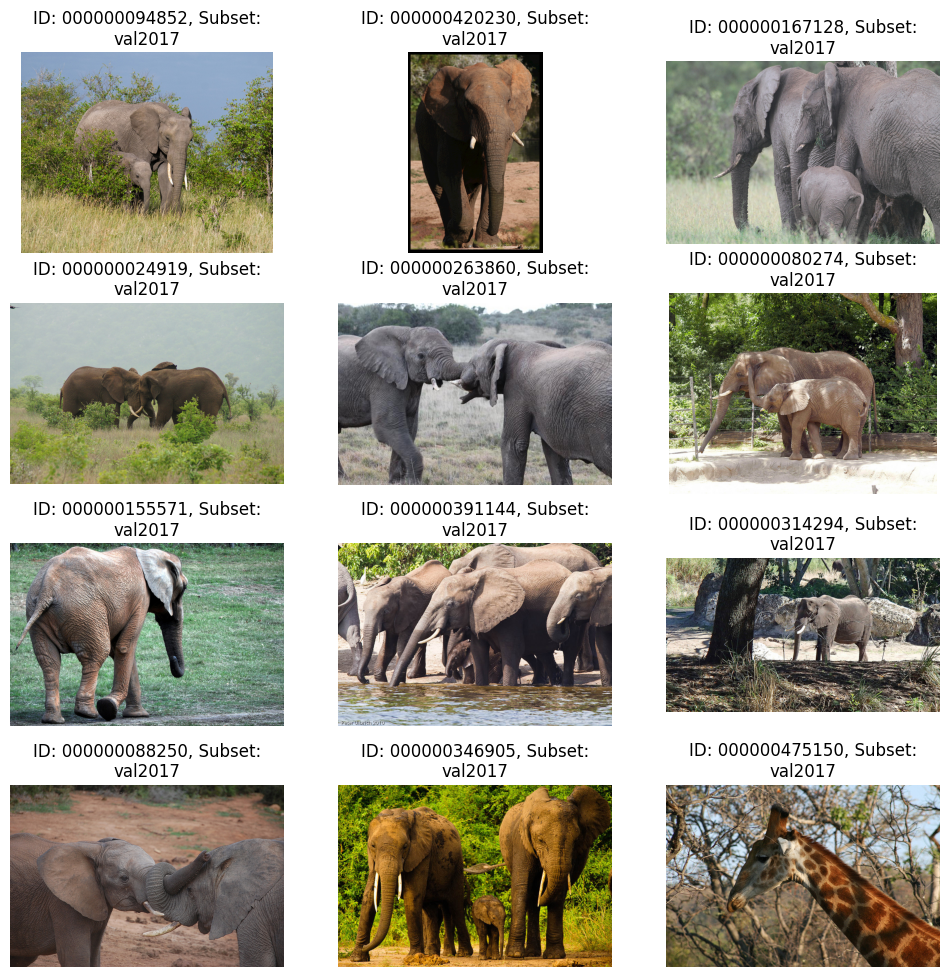

In [20]:
fig = visualizer.vis_gallery(id_list[:12], subset_list[:12])
fig.show()

### Explore with `text` query

Set text as query which you want to find similar dataset. You can set it as a sentence or a word.

In [21]:
topk_list = explorer.explore_topk("elephant", topk=15)

In [22]:
subset_list = []
id_list = []
for result in topk_list:
    subset_list.append(result.subset)
    id_list.append(result.id)

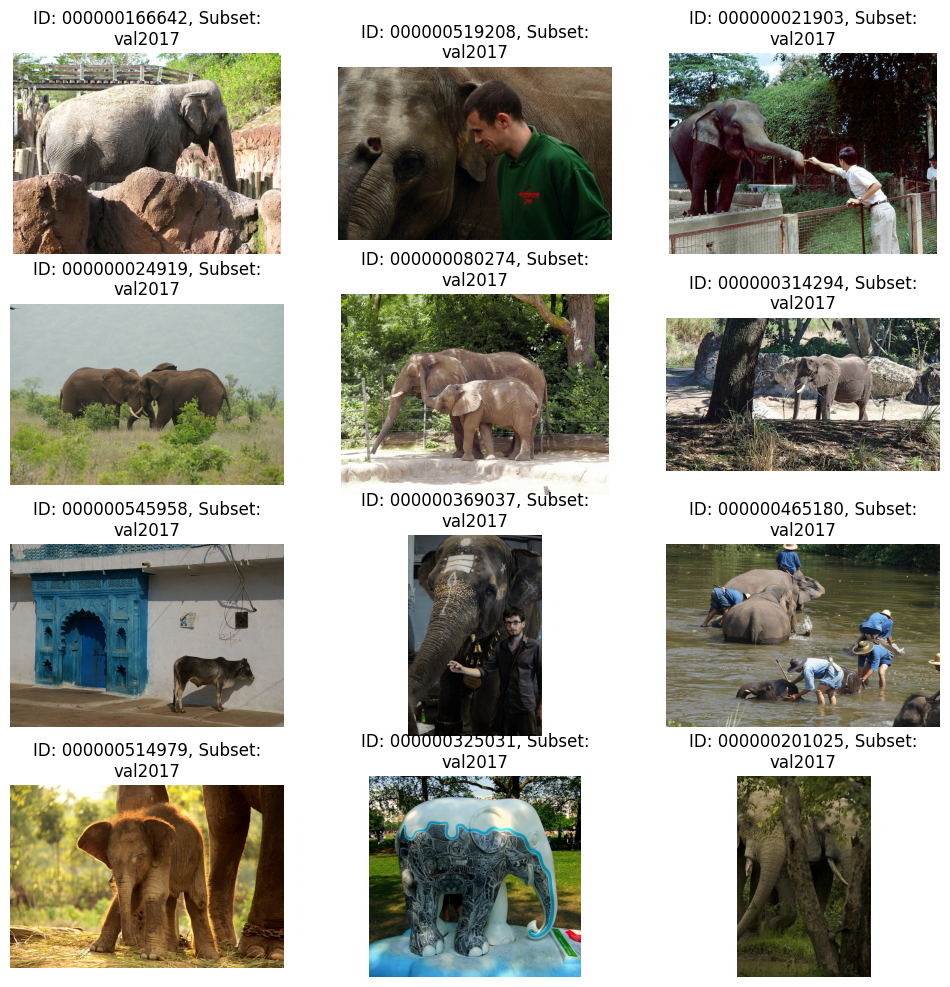

In [24]:
fig = visualizer.vis_gallery(id_list[:12], subset_list[:12])
fig.show()